In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #轉換色彩空間RGB>BGR

## 1-1. cluster with only RGB values

In [7]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    #print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [11]:
h, w, c = img.shape
#print(img.shape) #pixel= 1024*1024, RGB:3=彩色
Z= img.reshape((-1,3)) #少一個維度
#Z.shape
K=2
label, center=km_clust(Z,K)
# Now convert back into uint8, and make original image
center = np.uint8(center[:, :3])
#center
res=center[label.flatten()]  #label是1的:(107,95,71);Label是2的:(163,197,120)
res=res.reshape(img.shape)

[[163.22613261 197.72362568 120.58351272]
 [107.69216     95.56370383  71.60211064]]


In [ ]:
#label.flatten() #如果label是2維，要轉成1維

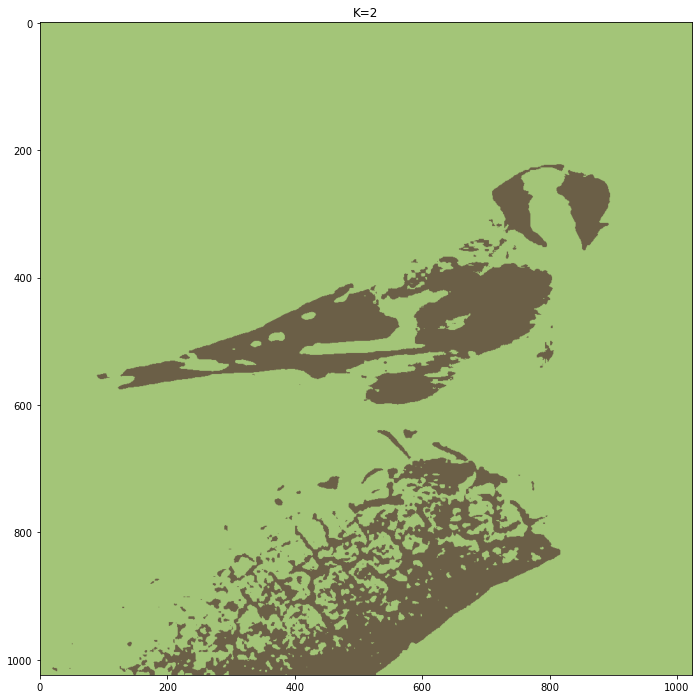

In [12]:
plt.figure(figsize=(16,12))
plt.title("K={}".format(K))
plt.imshow(res)

[[163.22644728 197.72642953 120.58504444]
 [107.70648253  95.57639636  71.60704611]]
[[160.65725904 204.753108   114.71535684]
 [183.93347416 182.70504319 164.91061685]
 [143.79190061 128.14948476  97.05476332]
 [ 57.91756002  54.84689433  45.98679369]]


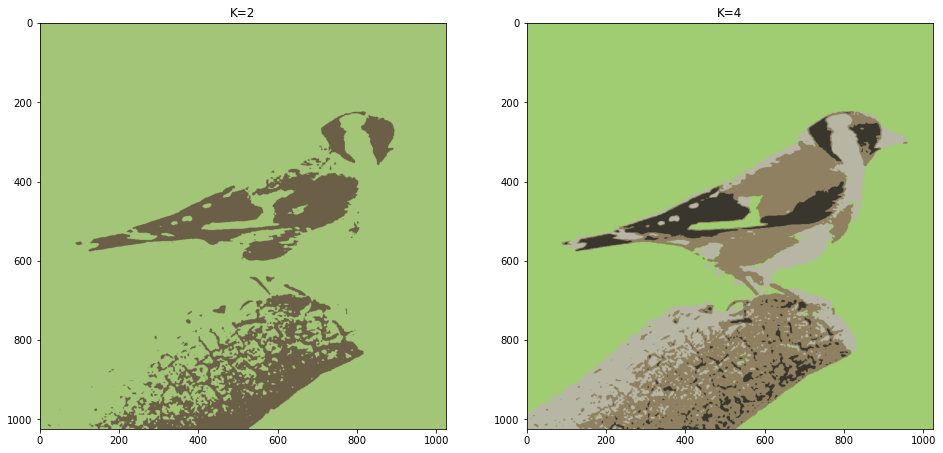

In [13]:
h, w, c = img.shape

Z= img.reshape((-1,3)) 
Ka=[2,4]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label, center=km_clust(Z,K)
    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res=center[label.flatten()] 
    res=res.reshape(img.shape)
    
    plt.subplot(1,len(Ka),i+1)
    plt.title("K={}".format(K))
    plt.imshow(res)

plt.show()

## 1-2. cluster with RGB values and the location

[[154.53046876 186.83080128 117.15096218 508.4664297  255.04032754]
 [156.36092338 180.01016589 110.30735066 514.52204323 766.98516808]]
[[151.96630719 194.18309579 111.39764866 253.89112334 255.69550137]
 [155.61356793 177.47569398 109.29540078 257.39525612 767.42727559]
 [157.04232679 179.12063936 122.74560508 766.19795792 254.82893334]
 [157.15652829 182.948362   111.44318251 769.08575221 767.07463965]]
[[152.4665958  194.795514   112.02181549 177.08069325 161.81864158]
 [160.46965704 203.22097694 117.82480486 844.70198469 865.94516626]
 [164.8689943  189.69662011 134.37699364 846.15816875 164.29857863]
 [157.65275773 196.44701798 111.30479003 198.93506695 509.91584316]
 [146.20942458 144.40323145 104.27274119 823.83140603 519.02453482]
 [148.11259958 187.29596162 110.75472333 514.13577215 246.86338007]
 [157.86230196 183.05399514 114.70315619 175.59770489 861.29682711]
 [158.10328448 173.75687142 108.07036526 507.56205595 773.09922455]]
[[160.98550493 187.69325305 114.2777278  130.

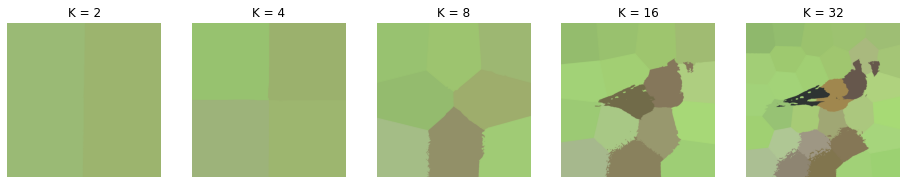

In [14]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[153.23190567 174.74060146 108.17459996 132.95564319 187.62653934]
 [157.92811616 193.12537625 119.93465161 122.18632742  60.97265493]]
[[166.1309179  200.18753894 129.37188905 165.73251337  51.02412826]
 [167.57483708 206.3566397  123.00689006 170.42282565 211.5999931 ]
 [114.24360741 102.20688147  76.20158527 173.87947991 137.41126162]
 [157.87792256 192.34225944 112.37965281  45.50581094 126.76299042]]
[[ 46.87518019  47.89265857  45.87654448 116.85837109 136.54271134]
 [167.97378874 200.53759131 133.52981202 187.76309531  52.90305033]
 [164.67389272 211.22417408 120.51763346 194.30122502 212.12525043]
 [158.12700675 199.71724099 110.7053567   45.37977425 125.9929856 ]
 [156.16126817 200.8994288  114.51455112  67.11200814  41.86689361]
 [132.43829046 120.16122801  90.59757711 218.23421932 127.94137856]
 [166.62712726 198.50718887 122.24306341  56.44968741 220.65748363]
 [162.47543397 144.52905955 105.21446935 123.28786256 156.74441057]]


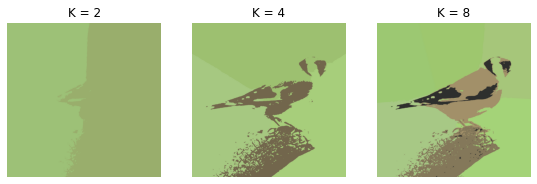

In [16]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])  #/4對location,顏色切分都較好
Z = Z.reshape(-1, 5)

Ks = [2,4,8]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()